# 1.import et nettoyages des données

In [106]:
# Import des librairies et des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/jokos29/Téléchargements/titanic(1).csv")

### Visualisation du jeu de données avant nettoyage

In [107]:
# Fournir un résumé concis de la base de donnée

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
# Visualiser les premieres lignes 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [110]:
# Vérifier les valeurs manquantes dans un jeu de données
# Nombre total de valeurs manquantes dans chaque colonne du DataFrame.
# Triées en ordre décroissant

df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [111]:
# Pourcentage des donnees manquantes par variables

prct_manquants = df.isna().sum().sort_values(ascending=True)*100/df.shape[0]
round(prct_manquants.sort_values(), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
Age            19.87
Cabin          77.10
dtype: float64

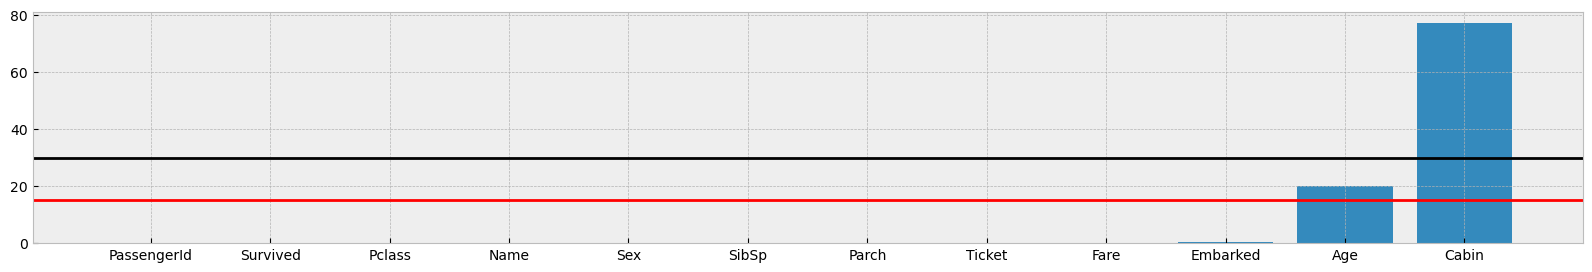

In [112]:
# Visualisation du pourcentage de manquants par donnees

fig = plt.figure(figsize=(20,3))
plt.bar(x=prct_manquants.sort_values().index, height=prct_manquants.sort_values().values)
plt.axhline(y = 15, color ='r', linestyle = '-')
plt.axhline(y = 30, color ='k', linestyle = '-')

### Nettoyage du jeu de données

In [113]:
# Supprimer les columns qui nous interresse pas pour l'analyse

df.dropna(subset=["Age","Embarked"], inplace=True) # on supprime les NaN dans les colonnes "Age" et "Embarked"


# Assemble 2 columns en 1. les columns SisSp et Parch pour en faire une seule qui sera le nombre de proche

df["SibSp"] = df["SibSp"] + df["Parch"]
df.rename(columns = {"SibSp": "Relatives"}, inplace = True) #Renomer la columns

df.drop(["Name","Cabin", "Parch"], axis=1, inplace=True)

### Visualisation du jeu de données après nettoyage

In [114]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Relatives      0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [115]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Relatives,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,113803,53.1000,S
4,5,0,3,male,35.0,0,373450,8.0500,S


In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,Relatives,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.946629,34.567251
std,258.683191,0.491139,0.836854,14.492933,1.485027,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,7.000000,512.329200


# 2. Qui étaient les passagers?

<Axes: >

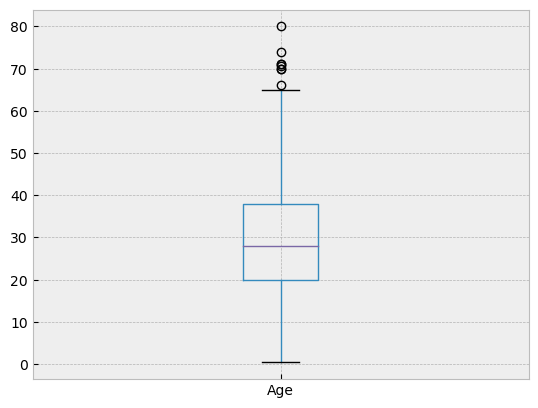

In [117]:
# création d'une boîte à moustaches pour analyser la colonne "Âge"

plt.figure()

df.boxplot(column = ["Age"])

In [118]:
# création de 3 sous-dataframes pour les hommes, femmes et enfants

df_men = df[(df["Sex"]=="male") & (df["Age"]>=18)]
df_women = df[(df["Sex"]=="female") & (df["Age"]>=18)]
df_children = df[df["Age"]<18]

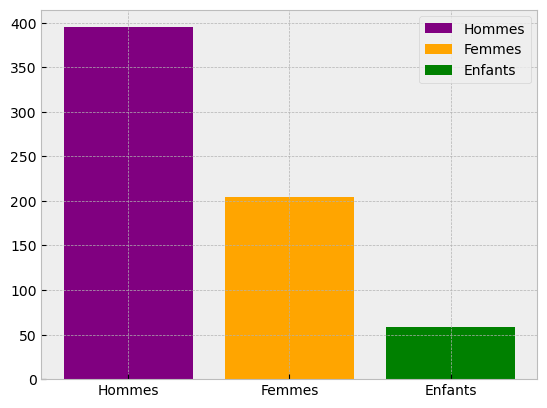

In [119]:
# visualisation graphique de plusieurs données

colors = ["purple","orange","green"]
groupes = ["Hommes", "Femmes", "Enfants"]
plt.style.use("bmh")

# bar plot montrant la répartition hommes/femmes/enfants

plt.figure()
plt.bar("Hommes", df_men["Sex"].value_counts(), label = groupes[0], color = colors[0])
plt.bar("Femmes", df_women["Sex"].value_counts(), label = groupes[1], color = colors[1])
plt.bar("Enfants", df_children["Sex"].value_counts(), label = groupes[2], color = colors[2])

plt.legend(groupes)

Text(0, 0.5, 'Fréquence')

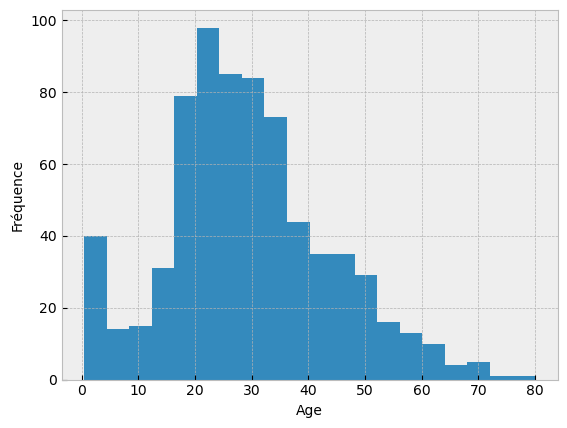

In [120]:
# histogramme des âges

plt.figure()
df["Age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Fréquence")

In [121]:
# calcul des tendances centrales pour la colonne "Âge"

mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode()

print(f"Âge moyen = {np.round(mean_age, decimals=1)} ans")
print(f"Âge médian = {median_age}")
print(f"Mode = {mode_age} ans")

Âge moyen = 29.6 ans
Âge médian = 28.0
Mode = 0    24.0
Name: Age, dtype: float64 ans


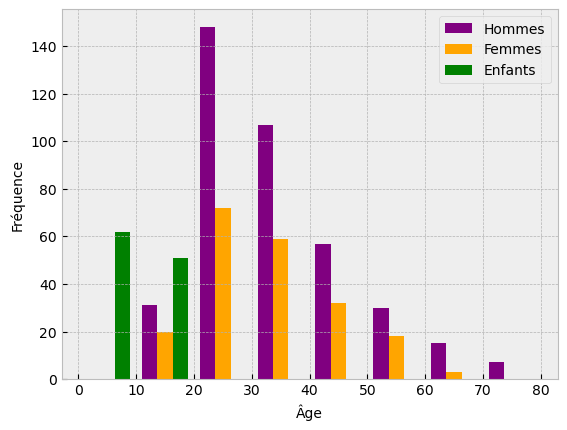

In [122]:
# histogramme permettant d'observer comment sont répartis les hommes/femmes/enfants par tranches d'âge

plt.figure()
plt.hist( [df_men["Age"],df_women["Age"], df_children["Age"]], bins=[0,10,20,30,40,50,60,70,80] , color = colors )
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend(["Hommes", "Femmes", "Enfants"])

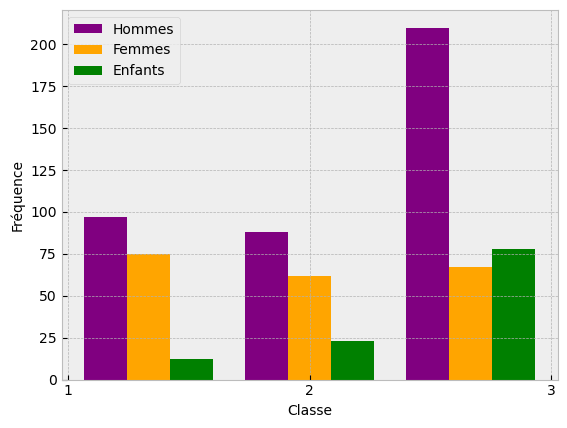

In [123]:
# histogramme permettant d'observer comment sont répartis les hommes/femmes/enfants par classe

plt.figure()
plt.hist( [df_men["Pclass"],df_women["Pclass"], df_children["Pclass"]], bins = 3, color = colors )
plt.xticks([1,2,3])
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.legend(["Hommes", "Femmes", "Enfants"])

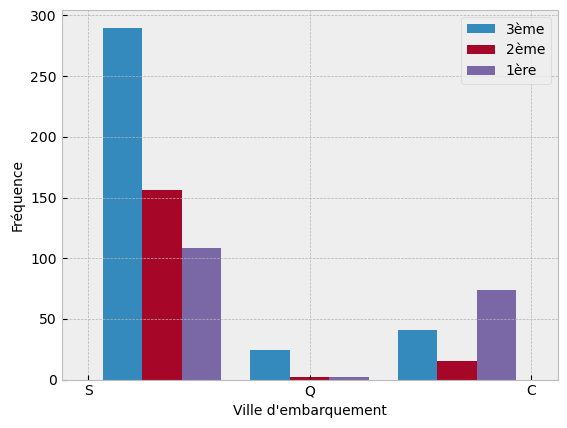

In [124]:
# histogramme permettant d'observer s'il y a un lien entre la ville d'embarquement et la classe dans le bateau

plt.figure()
plt.hist( [df[df["Pclass"]==3]["Embarked"], df[df["Pclass"]==2]["Embarked"], df[df["Pclass"]==1]["Embarked"]], bins = 3 )
plt.xticks(ticks=pd.unique(df["Embarked"]))
plt.xlabel("Ville d'embarquement")
plt.ylabel("Fréquence")
plt.margins(x = 0.1)
plt.legend(["3ème", "2ème", "1ère"])

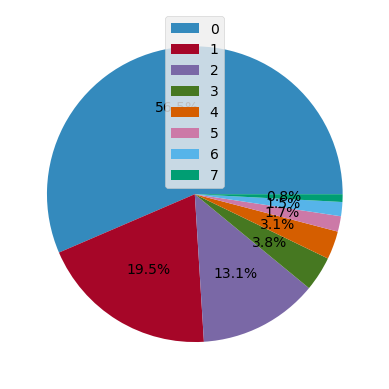

In [125]:
# pie chart permettant d'observer si les passagers voyagaient plutôt seul ou avec des proches

plt.figure()
plt.pie(df["Relatives"].value_counts(), autopct = "%1.1f%%")
plt.legend(["0","1","2","3","4","5","6","7"])

# 3. Facteurs de survie ?

In [126]:
# calcul de moyenne dans des regroupements

df.groupby(["Sex"]).mean()
df.groupby(["Sex"]).median()
df.groupby(["Sex", "Pclass"]).mean()

/tmp/ipykernel_4319/2611411264.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Sex"]).mean()
/tmp/ipykernel_4319/2611411264.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Sex"]).median()
/tmp/ipykernel_4319/2611411264.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Sex", "Pclass"]).mean()


PassengerId  Survived        Age  Relatives        Fare
Sex    Pclass                                                         
female 1        479.060241  0.963855  34.240964   1.060241  108.619680
       2        442.905405  0.918919  28.722973   1.121622   21.951070
       3        406.500000  0.460784  21.750000   1.774510   15.875369
male   1        451.910891  0.396040  41.281386   0.712871   71.142781
       2        450.333333  0.151515  30.740707   0.616162   21.113131
       3        455.217391  0.150198  26.507589   0.747036   12.162695

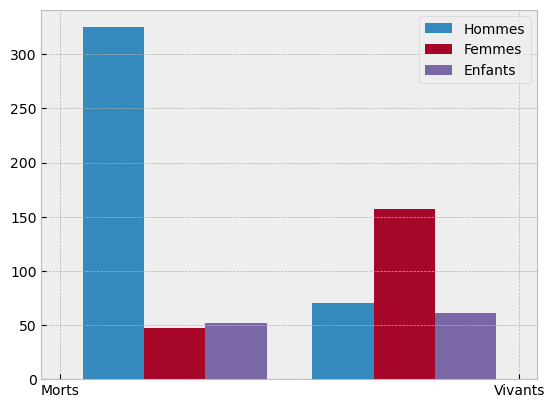

In [127]:
# on observe la répartition hommes/femmes/enfants parmi les morts/survivants

plt.figure()
plt.hist([df_men["Survived"], df_women["Survived"], df_children["Survived"]], bins = 2)
plt.xticks(ticks=[0,1], labels=["Morts", "Vivants"])
plt.margins(x=0.1)
plt.legend(["Hommes", "Femmes", "Enfants"])

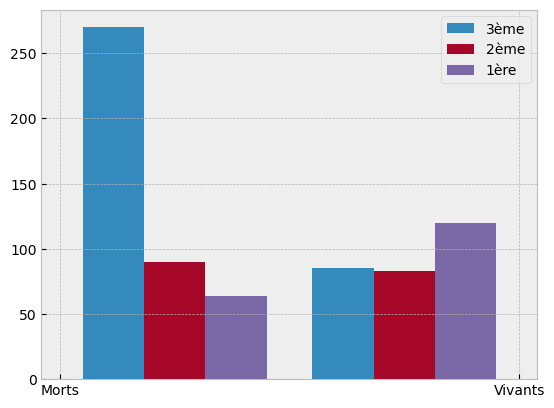

In [128]:
# on observe la répartition 3ème/2ème/1ère classes parmi les morts/survivants

plt.figure()
plt.hist([df[df["Pclass"]==3]["Survived"], df[df["Pclass"]==2]["Survived"], df[df["Pclass"]==1]["Survived"]], bins = 2)
plt.xticks(ticks=[0,1], labels=["Morts", "Vivants"])
plt.margins(x=0.1)
plt.legend(["3ème", "2ème", "1ère"])